In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split

path = 'teams.csv'
team = pd.read_csv(path)
team

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [195]:
teams = team[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [196]:
# show the relationship btn columns

print(teams.corr()["medals"])

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [192]:
teams.count()

2014

In [197]:
#check for columns missing values for cleaning
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [198]:
teams = teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [199]:
# no more null values in our data

teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

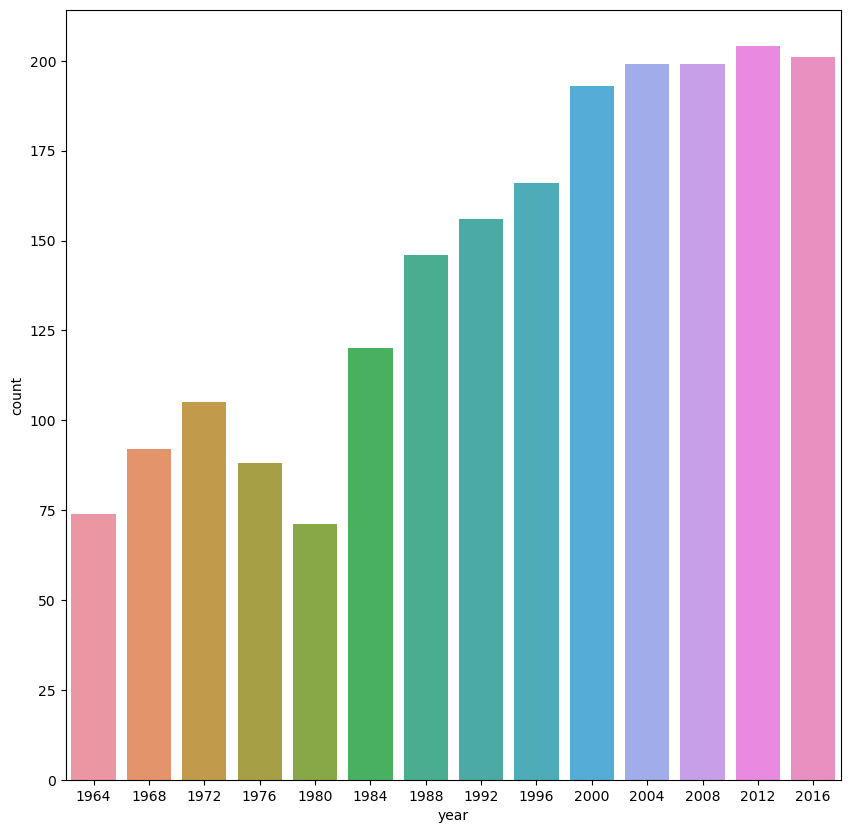

In [225]:
# teams.isna().sum() #count nan null values in each column
#teams['prev_medals'].isnull().any()  #check missing values too

# teams.iloc[:5,1:4] # select certain row and column
# teams.iloc[:,:].corr() # show cor-relation
# teams.iloc[:-4] #display all data except last 4 rows!
# teams.iloc[:,1].values
import seaborn as sn
import matplotlib.pyplot as plt

teams['year'].value_counts()
plt.figure(figsize = (10,10))
sn.countplot(teams['year'])


<AxesSubplot:>

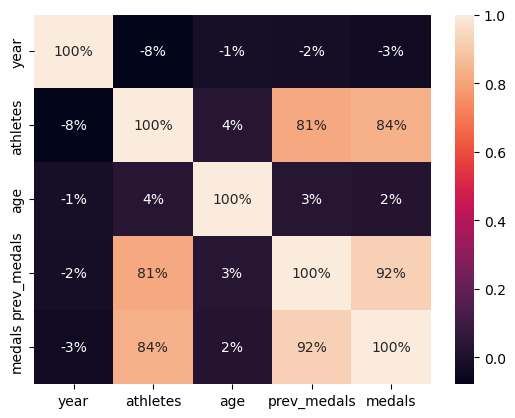

In [231]:
sn.heatmap(teams.corr(), annot=True, fmt=".0%")

In [232]:
# select records according to year

train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()
test.head

<bound method NDFrame.head of      team      country  year  athletes   age  prev_medals  medals
6     AFG  Afghanistan  2012         6  24.8          1.0       1
7     AFG  Afghanistan  2016         3  24.7          1.0       0
24    ALB      Albania  2012        10  25.7          0.0       0
25    ALB      Albania  2016         6  23.7          0.0       0
37    ALG      Algeria  2012        39  24.8          2.0       1
...   ...          ...   ...       ...   ...          ...     ...
2111  YEM        Yemen  2016         3  19.3          0.0       0
2131  ZAM       Zambia  2012         7  22.6          0.0       0
2132  ZAM       Zambia  2016         7  24.1          0.0       0
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[405 rows x 7 columns]>

In [179]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

predictors = ['athletes','prev_medals']
target = 'medals'

model.fit(train[predictors], train['medals'])
predictions = model.predict(test[predictors])
# print(predictions)

test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [174]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [182]:
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-1.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.0
24,ALB,Albania,2012,10,25.7,0.0,0,-1.0
25,ALB,Albania,2016,6,23.7,0.0,0,-2.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-2.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-2.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-2.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [187]:
from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(test["medals"], test["predictions"]))

accuracy: 0.05925925925925926


In [184]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0
